## Spotify Dataset

### Data Preparation

### <u>Dataset</u>: music.csv

### Data Dictionary

Attributes |Description
:-------|:---------------
**Highest Charting Position** | The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Number of Times Charted** |The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Week of Highest Charting** |The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Song Name** |Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Song iD** |The song ID provided by Spotify (unique to each song).
**Streams** | Approximate number of streams the song has.
**Artist** | The main artist/ artists involved in making the song.
**Artist Followers** | The number of followers the main artist has on Spotify.
**Genre** | The genres the song belongs to.
**Release Date** | The initial date that the song was released.
**Weeks Charted** | The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Popularity** | The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
**Danceability** | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
**Acousticness** |A measure from 0.0 to 1.0 of whether the track is acoustic.
**Energy** | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
**Instrumentalness** | Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
**Liveness** | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
**Loudness** | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
**Speechiness** | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
**Tempo** | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
**Valence** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
**Chord** | The main chord of the song instrumental.

### Data Exploration

**Import Python packages and dataset**

In [1]:
#data wrangling
import numpy as np
import pandas as pd 

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ticker formatter
import matplotlib.ticker as ticker

#text manipulation
import re

#read raw data as panda dataframe
raw_data  = pd.read_csv("./music.csv")

#Glimpse of imported raw csv data
raw_data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


**Summary Statistics**

In [2]:
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1481 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


**Proposed Data Cleaning Steps**

Columns | Observations
:-------|:---------------
`Index` | drop since it is redundant with dataframe index
`Week of Highest Charting` | split into 2 columns and changed the data type to date
`Song Name` | change from object to categorical
`Streams` | change from object to integer
`Artist` | change to categorical and add new column 'Number of Artist' (<u>Note:</u> For this task, we only analyze songs with *exactly one* artist
`Artist Followers` | change from object to integer
`Song ID` | change from object to categorical
`Genre` | change from object to categorical, split to distinct values (<u>Note:</u> This column has 75 missing values which is approximately 4.8%. We will this column for analysis since the missing data is not that significant)
`Release Date` | change from object to date
`Weeks Charted` | add new column 'Number of Weeks Chartered'
`Popularity` | change from object to integer
`Danceability` | change from object to float
`Energy` | change from object to float
`Loudness` | change from object to float
`Speechiness` | change from object to float
`Acousticness` | change from object to float
`Liveness` | change from object to float
`Tempo` | change from object to float
`Duration (ms)` | change from object to integer
`Valence` | change from object to float
`Chord` | change from object to categorical

### Data Cleaning

In [3]:
#create a copy from raw data
data = raw_data.copy(deep=True)

#drop Index column
data.drop(columns = ['Index'], inplace = True)

#split into 2 columns
data[['Week of Highest Charting Start', 'Week of Highest Charting End']] = data['Week of Highest Charting'].str.split("--", expand = True)

#change to date datatype
data['Week of Highest Charting Start'] = pd.to_datetime(data['Week of Highest Charting Start'])
data['Week of Highest Charting End'] = pd.to_datetime(data['Week of Highest Charting End'])

#change to categorical
data['Song Name'] = data['Song Name'].astype("category")

#change to integer
data['Streams'] = data['Streams'].str.replace(",","").astype("int64")

#change to categorical
data['Artist'] = data['Artist'].astype("category")

#add new column, assumes that artist names are separated by comma and space
data['Number of Artist'] = data['Artist'].str.count(', ')+ 1

#change to integer, replace empty values with 0
data['Artist Followers'] = data['Artist Followers'].str.replace(" ","0").astype("int64")

#change to categorical
data['Song ID'] = data['Song ID'].astype("category")

#split into distinct values,assumes that artist names are separated by comma and space
data['Number of Genre'] = data['Genre'].str.count(', ')+ 1
data['Genre'].str.split(', ', expand = True)
data['Genre'] = data['Genre'].astype("category")

#change to date datatype, If errors = ‘coerce’, then invalid parsing will be set as NaN.
data['Release Date'] = pd.to_datetime(data['Release Date'], format="%m/%d/%Y", errors='coerce')

#add new column, assumes that 1 week charted can be detected by '--'
data['Number of Weeks Charted'] = data['Weeks Charted'].str.count('--')+ 1

#change to integer, replace empty strings with 0
data['Popularity'] = data['Popularity'].str.replace(" ","0").astype("int64")

#change to float, replace empty strings with 0
data['Danceability'] = data['Danceability'].str.replace(" ","0").astype("float64")
data['Energy'] = data['Energy'].str.replace(" ","0").astype("float64")
data['Loudness'] = data['Loudness'].str.replace(" ","0").astype("float64")
data['Speechiness'] = data['Speechiness'].str.replace(" ","0").astype("float64")
data['Acousticness'] = data['Acousticness'].str.replace(" ","0").astype("float64")
data['Liveness'] = data['Liveness'].str.replace(" ","0").astype("float64")
data['Tempo'] = data['Tempo'].str.replace(" ","0").astype("float64")
data['Valence'] = data['Valence'].str.replace(" ","0").astype("float64")

#change to integer, replace empty strings with 0
data['Duration (ms)'] = data['Duration (ms)'].str.replace(" ","0").astype("int64")

#change to categorical
data['Chord'] = data['Chord'].astype("category")

**Recheck Cleaned Data**

In [4]:
#recheck data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Highest Charting Position       1556 non-null   int64         
 1   Number of Times Charted         1556 non-null   int64         
 2   Week of Highest Charting        1556 non-null   object        
 3   Song Name                       1556 non-null   category      
 4   Streams                         1556 non-null   int64         
 5   Artist                          1556 non-null   category      
 6   Artist Followers                1556 non-null   int64         
 7   Song ID                         1556 non-null   category      
 8   Genre                           1481 non-null   category      
 9   Release Date                    1528 non-null   datetime64[ns]
 10  Weeks Charted                   1556 non-null   object        
 11  Popu

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Number of Artist,Number of Genre,Number of Weeks Charted
count,1556.000000,1556.000000,1.556000e+03,1.556000e+03,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1481.000000,1556.000000
mean,87.744216,10.668380,6.340219e+06,1.461286e+07,69.593830,0.685119,0.629017,-6.303594,0.122782,0.246936,0.179921,121.942822,196541.492288,0.511065,1.335476,3.099257,11.668380
std,58.147225,16.360546,3.369479e+06,1.666242e+07,16.826585,0.153267,0.169533,2.556372,0.110479,0.250308,0.144362,31.231031,49824.675446,0.230591,0.765360,1.582935,16.360546
min,1.000000,1.000000,4.176083e+06,0.000000e+00,0.000000,0.000000,0.000000,-25.166000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,37.000000,1.000000,4.915322e+06,1.990790e+06,65.000000,0.597000,0.528000,-7.481500,0.045125,0.047125,0.095575,97.019500,168728.500000,0.340000,1.000000,2.000000,2.000000
50%,80.000000,4.000000,5.275748e+06,6.852509e+06,73.000000,0.703500,0.641000,-5.955000,0.074950,0.158500,0.123500,121.955000,193303.500000,0.510500,1.000000,3.000000,5.000000
75%,137.000000,12.000000,6.455044e+06,2.253630e+07,80.000000,0.795000,0.750000,-4.668000,0.164000,0.386000,0.215250,143.177750,218766.000000,0.690000,1.000000,4.000000,13.000000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000,9.000000,11.000000,143.000000


In [5]:
data.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Liveness,Tempo,Duration (ms),Valence,Chord,Week of Highest Charting Start,Week of Highest Charting End,Number of Artist,Number of Genre,Number of Weeks Charted
0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",2017-12-08,...,0.3590,134.002,211560,0.589,B,2021-07-23,2021-07-30,1,2.0,9
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,2021-07-09,...,0.1030,169.928,141806,0.478,C#/Db,2021-07-23,2021-07-30,1,1.0,4
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,2021-05-21,...,0.0849,166.928,178147,0.688,A,2021-06-25,2021-07-02,1,1.0,12
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",2021-06-25,...,0.3640,126.026,231041,0.591,B,2021-07-02,2021-07-09,1,2.0,6
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",2021-07-23,...,0.0501,149.995,212000,0.894,D#/Eb,2021-07-23,2021-07-30,1,2.0,2


In [6]:
#select single artist
data_one = data[data['Number of Artist'] == 1]
data_one.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Liveness,Tempo,Duration (ms),Valence,Chord,Week of Highest Charting Start,Week of Highest Charting End,Number of Artist,Number of Genre,Number of Weeks Charted
0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",2017-12-08,...,0.3590,134.002,211560,0.589,B,2021-07-23,2021-07-30,1,2.0,9
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,2021-07-09,...,0.1030,169.928,141806,0.478,C#/Db,2021-07-23,2021-07-30,1,1.0,4
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,2021-05-21,...,0.0849,166.928,178147,0.688,A,2021-06-25,2021-07-02,1,1.0,12
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",2021-06-25,...,0.3640,126.026,231041,0.591,B,2021-07-02,2021-07-09,1,2.0,6
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",2021-07-23,...,0.0501,149.995,212000,0.894,D#/Eb,2021-07-23,2021-07-30,1,2.0,2


In [7]:
#group by artists and select max number of followers for artists with multiple values of 'Artists Followers'
top_artist = pd.DataFrame(data_one.groupby("Artist")["Artist Followers"].max())

#get total number of streams per artist
top_artist['Streams'] = pd.DataFrame(data_one.groupby("Artist")["Streams"].sum())

# top 10 artists by the number of followers in descending order
top_artist.sort_values(by = "Artist Followers", ascending = False, inplace = True)
top_10_artist = pd.DataFrame(top_artist.head(10)).reset_index()
top_10_artist

,Artist,Artist Followers,Streams
0,Ed Sheeran,83337783.0,80580568
1,Ariana Grande,67208170.0,133298543
2,Drake,56327031.0,128538281
3,Justin Bieber,48544923.0,225842427
4,Billie Eilish,47061119.0,97575714
5,Eminem,46814751.0,162935796
6,Taylor Swift,42227614.0,381480455
7,BTS,37151476.0,238400020
8,Trio Vegabajeño,36177712.0,5842320
9,Bad Bunny,36177712.0,203813133


In [8]:
#top 10 if ranked by the total number of streams in descending order
top_streams = pd.DataFrame(data_one.groupby("Artist")["Streams"].sum())
top_streams.sort_values(by = "Streams", ascending = False, inplace = True)
top_streams = pd.DataFrame(top_streams.head(10)).reset_index()
top_streams

,Artist,Streams
0,Taylor Swift,381480455
1,BTS,238400020
2,Justin Bieber,225842427
3,Lil Uzi Vert,208822039
4,Bad Bunny,203813133
5,Pop Smoke,173634217
6,Juice WRLD,166703004
7,Olivia Rodrigo,163685977
8,Eminem,162935796
9,The Weeknd,149088439


In [9]:
#artists with most number of followers and highest number of streams
highlight_artist = pd.merge(top_10_artist, top_streams, how='inner', on=['Artist'])
highlight_artist

,Artist,Artist Followers,Streams_x,Streams_y
0,Justin Bieber,48544923.0,225842427,225842427
1,Eminem,46814751.0,162935796,162935796
2,Taylor Swift,42227614.0,381480455,381480455
3,BTS,37151476.0,238400020,238400020
4,Bad Bunny,36177712.0,203813133,203813133


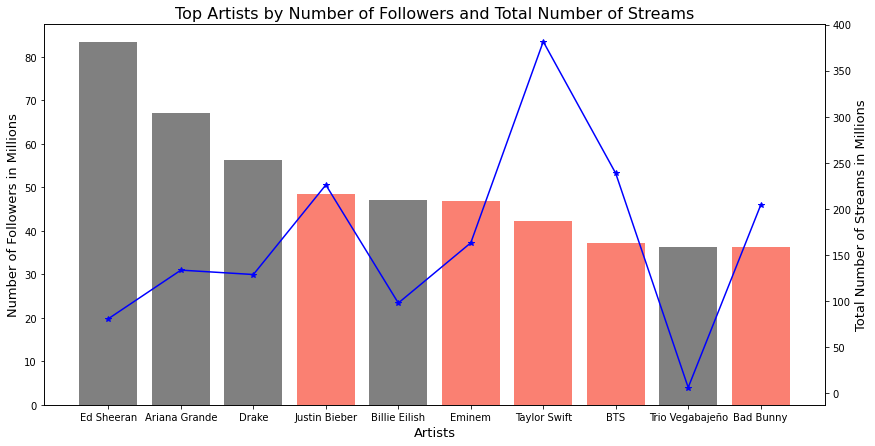

In [10]:
#visualisation
fig,ax = plt.subplots(figsize=(14,7))

#re-use x-axis for the secondary y-axis
ax2 = ax.twinx()            

#highlight artists
#highlight = {'Ed Sheeran' : 'gray',
             #'Ariana Grande' : 'gray',
             #'Drake' : 'gray',
             #'Justin Bieber': 'salmon', 
             #'Billie Eilish' : 'gray',
             #'Eminem': 'salmon', 
             #'Taylor Swift': 'salmon', 
             #'BTS' : 'salmon',
             #'Trio Vegabajeño' : 'gray',
             #'Bad Bunny':'salmon'}

#creating bar chart
ax.bar(x = top_10_artist['Artist'], height = top_10_artist['Artist Followers'], 
       color=('gray', 'gray', 'gray','salmon','gray', 'salmon', 'salmon', 'salmon', 'gray', 'salmon'))

#creating line chart
ax2.plot(top_10_artist['Streams'], marker='*',color = 'blue')

#format y-axes
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax2.yaxis.set_major_formatter(ticks_y)

#labels
plt.title('Top Artists by Number of Followers and Total Number of Streams', fontsize=16)
ax.set_xlabel('Artists', fontsize=13)
ax.set_ylabel('Number of Followers in Millions', fontsize=13)
ax2.set_ylabel('Total Number of Streams in Millions', fontsize=13)

plt.show()

**Top 10 artists by the number of followers in descending order and their total number of streams are shown below:**

In [11]:
top_10_artist

,Artist,Artist Followers,Streams
0,Ed Sheeran,83337783.0,80580568
1,Ariana Grande,67208170.0,133298543
2,Drake,56327031.0,128538281
3,Justin Bieber,48544923.0,225842427
4,Billie Eilish,47061119.0,97575714
5,Eminem,46814751.0,162935796
6,Taylor Swift,42227614.0,381480455
7,BTS,37151476.0,238400020
8,Trio Vegabajeño,36177712.0,5842320
9,Bad Bunny,36177712.0,203813133


**The highlighted artists in the visualisation are shown below. These are the artists who are among the top 10 if ranked by the total number of streams in descending order.**

In [12]:
highlight_artist

,Artist,Artist Followers,Streams_x,Streams_y
0,Justin Bieber,48544923.0,225842427,225842427
1,Eminem,46814751.0,162935796,162935796
2,Taylor Swift,42227614.0,381480455,381480455
3,BTS,37151476.0,238400020,238400020
4,Bad Bunny,36177712.0,203813133,203813133


In [13]:
#data preparation
data_jb = data[data['Artist'] == 'Justin Bieber'][['Song Name','Release Date','Popularity', 'Speechiness', 'Valence']]
data_jb.sort_values(by = 'Release Date', ascending = True, inplace = True)

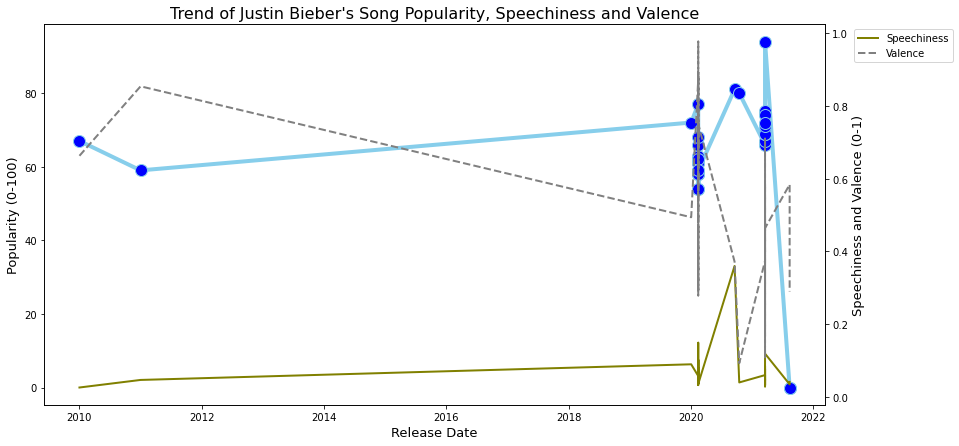

In [14]:
#visualisation
fig,jb = plt.subplots(figsize=(14,7))

#re-use x-axis for the secondary y-axis
jb2 = jb.twinx()

#creating line chart
jb.plot(data_jb['Release Date'], data_jb['Popularity'], 
        marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

#re-use x-axis for the secondary y-axis
jb2.plot(data_jb['Release Date'], data_jb['Speechiness'], 
         marker='', color='olive', linewidth=2, label="Speechiness")

jb2.plot(data_jb['Release Date'], data_jb['Valence'], 
         marker='', color='gray', linewidth=2, linestyle='dashed', label="Valence")

#labels
plt.title("Trend of Justin Bieber's Song Popularity, Speechiness and Valence", fontsize=16)
jb.set_xlabel('Release Date', fontsize=13)
jb.set_ylabel('Popularity (0-100)', fontsize=13)
jb2.set_ylabel('Speechiness and Valence (0-1)', fontsize=13)

# show legend
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper center', ncol=1)

# show graph
plt.show()

In [15]:
data_jb.set_index('Song Name')

,Release Date,Popularity,Speechiness,Valence
Song Name,,,,
Somebody,2010-01-01,67,0.0259,0.6630
Mistletoe,2011-01-01,59,0.0467,0.8540
Yummy,2020-01-03,72,0.0897,0.4940
Intentions (feat. Quavo),2020-02-14,77,0.0575,0.8740
Take It Out On Me,2020-02-14,54,0.1020,0.2790
E.T.A.,2020-02-14,58,0.0660,0.4570
Confirmation,2020-02-14,58,0.0375,0.4490
Changes,2020-02-14,62,0.0420,0.6120
Available,2020-02-14,58,0.0359,0.5970


**Justin Bieber songs started from 2010 with the song 'Somebody' and reached the peak of popularity of 94 with the song 'Peaches'.**

In [16]:
#data preparation
data_em = data[data['Artist'] == 'Eminem'][['Song Name','Release Date','Popularity', 'Speechiness', 'Valence']]
data_em.sort_values(by = 'Release Date', ascending = True, inplace = True)

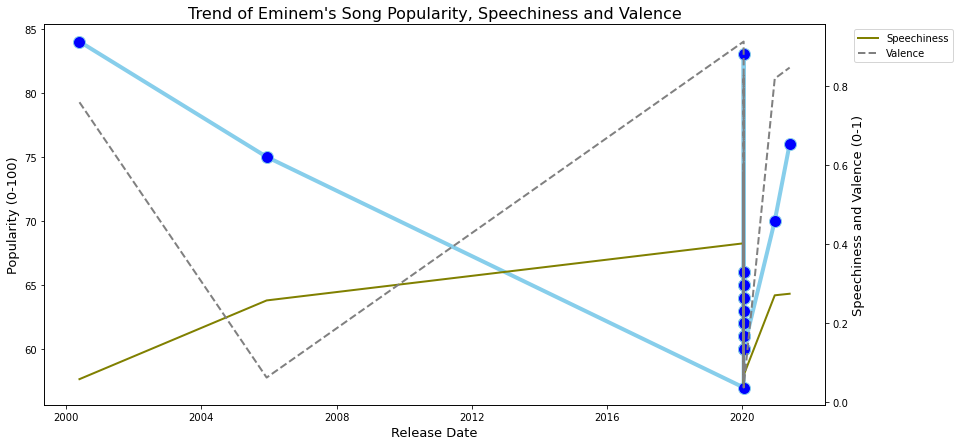

In [17]:
#visualisation
fig,em = plt.subplots(figsize=(14,7))

#re-use x-axis for the secondary y-axis
em2 = em.twinx()

#creating line chart
em.plot(data_em['Release Date'], data_em['Popularity'], 
        marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

#re-use x-axis for the secondary y-axis
em2.plot(data_em['Release Date'], data_em['Speechiness'], 
         marker='', color='olive', linewidth=2, label="Speechiness")

em2.plot(data_em['Release Date'], data_em['Valence'], 
         marker='', color='gray', linewidth=2, linestyle='dashed', label="Valence")

#labels
plt.title("Trend of Eminem's Song Popularity, Speechiness and Valence", fontsize=16)
em.set_xlabel('Release Date', fontsize=13)
em.set_ylabel('Popularity (0-100)', fontsize=13)
em2.set_ylabel('Speechiness and Valence (0-1)', fontsize=13)

# show legend
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper center', ncol=1)

# show graph
plt.show()

In [18]:
data_em.set_index('Song Name')

,Release Date,Popularity,Speechiness,Valence
Song Name,,,,
The Real Slim Shady,2000-05-23,84,0.0572,0.7600
"Lose Yourself - From ""8 Mile"" Soundtrack",2005-12-06,75,0.2570,0.0612
Alfred - Interlude,2020-01-17,57,0.4020,0.9140
Farewell,2020-01-17,61,0.1060,0.4670
Never Love Again,2020-01-17,62,0.2460,0.5810
"Yah Yah (feat. Royce Da 5'9"", Black Thought, Q-Tip & Denaun)",2020-01-17,60,0.3840,0.3560
Stepdad,2020-01-17,61,0.1780,0.5570
Marsh,2020-01-17,62,0.2050,0.0495
Lock It Up (feat. Anderson .Paak),2020-01-17,64,0.2210,0.5160


**Eminem songs reached the peak of popularity of 84 with the song 'The Real Slim Shady'. His song 'Godzilla (feat. Juice WRLD)' is also popular in 2020 with a popularity value of 83.**

In [19]:
#data preparation
data_ts = data[data['Artist'] == 'Taylor Swift'][['Song Name','Release Date','Popularity', 'Speechiness', 'Valence']]
data_ts.sort_values(by = 'Release Date', ascending = True, inplace = True)

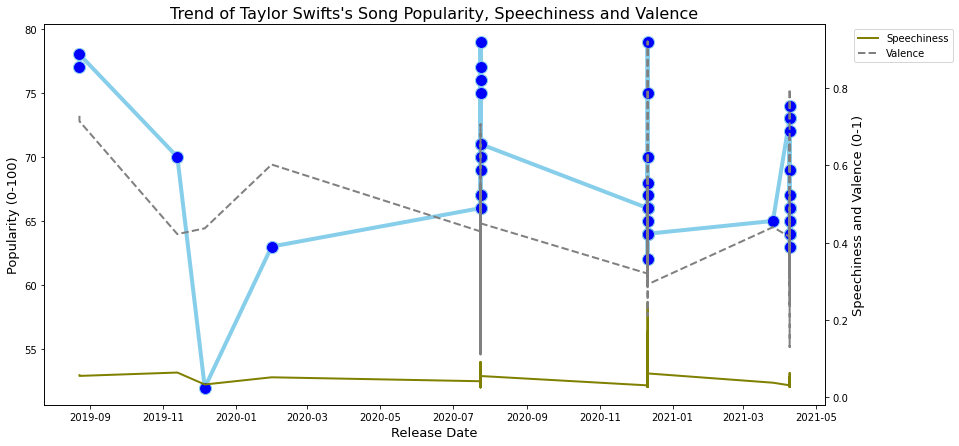

In [20]:
#visualisation
fig,ts = plt.subplots(figsize=(14,7))

#re-use x-axis for the secondary y-axis
ts2 = ts.twinx()

#creating line chart
ts.plot(data_ts['Release Date'], data_ts['Popularity'], 
        marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

#re-use x-axis for the secondary y-axis
ts2.plot(data_ts['Release Date'], data_ts['Speechiness'], 
         marker='', color='olive', linewidth=2, label="Speechiness")

ts2.plot(data_ts['Release Date'], data_ts['Valence'], 
         marker='', color='gray', linewidth=2, linestyle='dashed', label="Valence")

#labels
plt.title("Trend of Taylor Swifts's Song Popularity, Speechiness and Valence", fontsize=16)
ts.set_xlabel('Release Date', fontsize=13)
ts.set_ylabel('Popularity (0-100)', fontsize=13)
ts2.set_ylabel('Speechiness and Valence (0-1)', fontsize=13)

# show legend
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper center', ncol=1)

# show graph
plt.show()

In [21]:
data_ts.set_index('Song Name')

,Release Date,Popularity,Speechiness,Valence
Song Name,,,,
ME! (feat. Brendon Urie of Panic! At The Disco),2019-08-23,77,0.0571,0.728
You Need To Calm Down,2019-08-23,78,0.0553,0.714
Lover (Remix) [feat. Shawn Mendes],2019-11-13,70,0.0640,0.422
Christmas Tree Farm,2019-12-06,52,0.0331,0.437
Only The Young - Featured in Miss Americana,2020-01-31,63,0.0517,0.602
hoax,2020-07-24,66,0.0415,0.429
cardigan,2020-07-24,79,0.0424,0.551
exile (feat. Bon Iver),2020-07-24,77,0.0287,0.152
the 1,2020-07-24,75,0.0522,0.172


**Taylor Swift's had multiple popular songs at the same release date 2020 and 2021. Most probably these songs are included in the same album.**

In [22]:
#data preparation
data_bts = data[data['Artist'] == 'BTS'][['Song Name','Release Date','Popularity', 'Speechiness', 'Valence']]
data_bts.sort_values(by = 'Release Date', ascending = True, inplace = True)

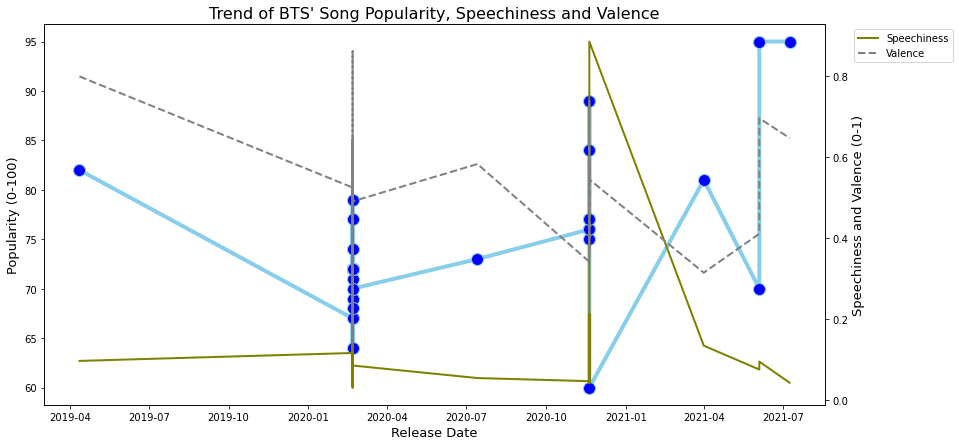

In [23]:
#visualisation
fig,bts = plt.subplots(figsize=(14,7))

#re-use x-axis for the secondary y-axis
bts2 = bts.twinx()

#creating line chart
bts.plot(data_bts['Release Date'], data_bts['Popularity'], 
        marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

#re-use x-axis for the secondary y-axis
bts2.plot(data_bts['Release Date'], data_bts['Speechiness'], 
         marker='', color='olive', linewidth=2, label="Speechiness")

bts2.plot(data_bts['Release Date'], data_bts['Valence'], 
         marker='', color='gray', linewidth=2, linestyle='dashed', label="Valence")

#labels
plt.title("Trend of BTS' Song Popularity, Speechiness and Valence", fontsize=16)
bts.set_xlabel('Release Date', fontsize=13)
bts.set_ylabel('Popularity (0-100)', fontsize=13)
bts2.set_ylabel('Speechiness and Valence (0-1)', fontsize=13)

# show legend
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper center', ncol=1)

# show graph
plt.show()

In [24]:
data_bts.set_index('Song Name')

,Release Date,Popularity,Speechiness,Valence
Song Name,,,,
Boy With Luv (feat. Halsey),2019-04-12,82,0.0965,0.798
Respect,2020-02-21,67,0.1160,0.524
Outro : Ego,2020-02-21,69,0.0958,0.473
Moon,2020-02-21,72,0.0596,0.640
Inner Child,2020-02-21,71,0.0725,0.332
We are Bulletproof : the Eternal,2020-02-21,72,0.0309,0.190
Friends,2020-02-21,72,0.0407,0.648
00:00 (Zero O’Clock),2020-02-21,72,0.0579,0.196
UGH!,2020-02-21,72,0.1280,0.333


**BTS songs had multiple popular songs at the same release date 2020. Its latest 2 songs 'Butter' and 'Permission to Dance' are very popular with popularity value of 95.**

In [25]:
#data preparation
data_bb = data[data['Artist'] == 'Bad Bunny'][['Song Name','Release Date','Popularity', 'Speechiness', 'Valence']]
data_bb.sort_values(by = 'Release Date', ascending = True, inplace = True)

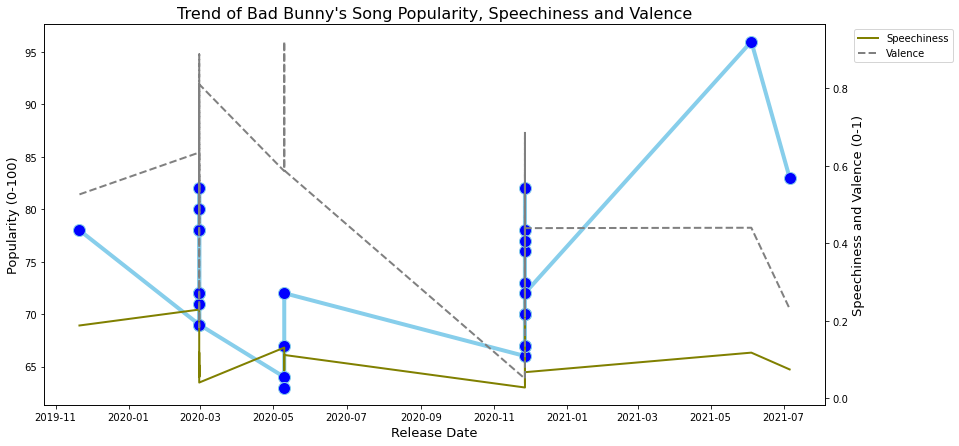

In [26]:
#visualisation
fig,bb = plt.subplots(figsize=(14,7))

#re-use x-axis for the secondary y-axis
bb2 = bb.twinx()

#creating line chart
bb.plot(data_bb['Release Date'], data_bb['Popularity'], 
        marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

#re-use x-axis for the secondary y-axis
bb2.plot(data_bb['Release Date'], data_bb['Speechiness'], 
         marker='', color='olive', linewidth=2, label="Speechiness")

bb2.plot(data_bb['Release Date'], data_bb['Valence'], 
         marker='', color='gray', linewidth=2, linestyle='dashed', label="Valence")

#labels
plt.title("Trend of Bad Bunny's Song Popularity, Speechiness and Valence", fontsize=16)
bb.set_xlabel('Release Date', fontsize=13)
bb.set_ylabel('Popularity (0-100)', fontsize=13)
bb2.set_ylabel('Speechiness and Valence (0-1)', fontsize=13)

# show legend
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper center', ncol=1)

# show graph
plt.show()

In [27]:
data_bb.set_index('Song Name')

,Release Date,Popularity,Speechiness,Valence
Song Name,,,,
Vete,2019-11-21,78,0.1880,0.5260
<3,2020-02-29,69,0.2290,0.6340
Soliá,2020-02-29,72,0.0854,0.1840
25/8,2020-02-29,71,0.0549,0.5420
Pero Ya No,2020-02-29,72,0.1180,0.7420
A Tu Merced,2020-02-29,82,0.0568,0.8870
Si Veo a Tu Mamá,2020-02-29,80,0.0646,0.8240
La Difícil,2020-02-29,78,0.0858,0.7610
Yo Perreo Sola,2020-02-29,78,0.0695,0.4530


**Bad Bunny songs had multiple popular songs at the same release date 2020 and reached the peak of popularity of 96 with the song 'Yonaguni'.**

In [28]:
#select songs released in year 2020
data_2020 = data[(data['Release Date'] >= '2020-01-01') & (data['Release Date'] <= '2020-12-31')]

#select the main genre to avoid multiple counting, assumes that the first value is the main genre of the song
pd.options.mode.chained_assignment = None
data_2020[['Main Genre', 'Secondary Genres']] = data_2020['Genre'].str.split(",", n=1, expand = True)

#group by week and genre
data_genre = pd.DataFrame(data_2020.groupby(["Week of Highest Charting Start", "Main Genre"])["Song Name"].count()).reset_index()

#top 10 genres
top_genre = pd.DataFrame(data_genre.groupby("Main Genre")["Song Name"].sum())
top_genre.sort_values(by="Song Name", ascending = False, inplace = True)
top_10_genre = pd.DataFrame(top_genre.head(10)).reset_index()

**Top 10 Popular Genres by the count of songs in descending orderare shown below:**

In [29]:
top_10_genre

,Main Genre,Song Name
0,dance pop,111
1,latin,92
2,melodic rap,44
3,atl hip hop,40
4,pop,39
5,k-pop,35
6,chicago rap,31
7,hip hop,31
8,german hip hop,27
9,canadian pop,23


In [30]:
data_genre.sort_values(by="Week of Highest Charting Start", ascending = False, inplace = True)
data_genre_long = data_genre[data_genre['Main Genre'].isin(['dance pop', 'latin', 'melodic rap', 'atl hip hop', 'pop', 'k-pop',
                                          'chicago rap', 'hip hop', 'german hip hop', 'canadian pop'])]
data_genre_long.sort_values(by='Week of Highest Charting Start', ascending = False, inplace=True)
data_genre_long['Week of Highest Charting Start'] = pd.to_datetime(data_genre_long['Week of Highest Charting Start']).dt.date
data_genre_long

,Week of Highest Charting Start,Main Genre,Song Name
397,2021-05-07,dance pop,1
396,2021-04-23,chicago rap,1
394,2021-04-02,pop,1
392,2021-04-02,dance pop,1
378,2021-02-05,latin,2
...,...,...,...
7,2020-01-10,dance pop,11
6,2020-01-10,atl hip hop,2
3,2020-01-03,dance pop,2
2,2020-01-03,canadian pop,1


In [31]:
data_genre_wide = data_genre_long.pivot(columns='Week of Highest Charting Start', index='Main Genre', values='Song Name')
data_genre_wide.reset_index()

Week of Highest Charting Start,Main Genre,2019-12-27,2020-01-03,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,...,2020-12-11,2020-12-18,2020-12-25,2021-01-01,2021-01-15,2021-01-22,2021-02-05,2021-04-02,2021-04-23,2021-05-07
0,atl hip hop,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,canadian pop,NaN,1.0,NaN,NaN,NaN,1.0,1.0,14.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chicago rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,dance pop,1.0,2.0,11.0,2.0,NaN,NaN,2.0,1.0,2.0,...,NaN,4.0,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0
4,german hip hop,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,hip hop,NaN,NaN,NaN,11.0,NaN,1.0,NaN,1.0,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,k-pop,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,latin,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN
8,melodic rap,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,pop,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


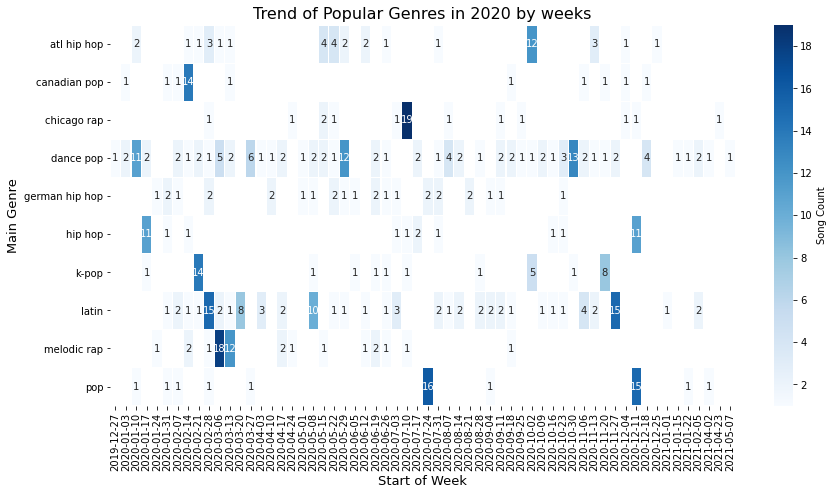

In [32]:
#heatmap visualisation
plt.subplots(figsize=(14,7))
ax = sns.heatmap(data_genre_wide,cmap="Blues", linewidths=.1, annot=True, cbar_kws={'label': 'Song Count'})
plt.title("Trend of Popular Genres in 2020 by weeks", fontsize=16)
plt.xlabel('Start of Week', fontsize=13)
plt.ylabel('Main Genre', fontsize=13)
plt.show()

**The heatmap above shows the weekly trends of popular genres. Chicago rap has the highest song count of 19 in the week of 2020-07-10.**

In [33]:
#correlation
data_corr = data[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']]

In [ ]:
#pairgrid visualisation
fig = sns.PairGrid(data = data_corr)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.regplot ,scatter_kws ={'s':5})
fig.map_diag(sns.histplot)
fig.add_legend()
plt.show()

**The pairplot is not that useful to show correlation of Popularity versus other attributes.**

In [ ]:
data_corr.corr()

In [ ]:
#correlation visualisation
plt.subplots(figsize=(9,9))
sns.heatmap(data_corr.corr(),cmap="Blues", linewidths=.5, annot=True, cbar_kws={'label': 'Correlation Value'})
plt.title("Correlation of Song Popularity with Different Attributes", fontsize=16)
plt.show()

In [ ]:
#multiple linear regression
import statsmodels.formula.api as sm

result = sm.ols(formula='Popularity ~ Danceability + Energy + Loudness + Speechiness + Acousticness + Liveness + Tempo + Valence', data=data).fit()
result.params

In [ ]:
result.summary()

**Based on the correlation value and regression results coefficients, Danceablity (17.6364), Energy(Energy), Acoustiness(4.8116) and Tempo (0.0257) have positive contribution to Popularity while Loudness (-0.3112), Speechiness (-6.8383), Liveness (-1.3075), and Valence (-5.8800) have negative contribution. However, the result model has very low Adj. R-Squared (0.059) which means that it cannot accurately predict the target variable.**